# Imports, Variables and Functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import pandas as pd
import numpy as np
import os

path = 'power-consumption'
processed_path = os.path.join(path, '.processed')
processed_file = os.path.join(processed_path, 'household-pow.csv')

In [7]:
def plot_time_values(input_df, size=(18,12)):
    plt.figure(figsize=size)
    for i, column in enumerate(input_df.columns):
        plt.subplot(len(input_df.columns), 2, i + 1)
        plt.title(column)
        plt.plot(input_df.index, input_df[column])
    plt.tight_layout()

In [44]:
def plot_time_with_heatmap(x, y, x_label, y_label, size=(24,6)):
    _, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, figsize=size, gridspec_kw={'height_ratios': [1, 3]})
    extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
    extent = mdates.date2num(extent)
    ax1.imshow(np.expand_dims(y, axis=0), cmap="plasma", aspect="auto", extent=extent)
    ax1.set_yticks([])
    ax2.plot(x,y)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)

# Exploratory Analysis - Household Power Consumption Dataset
The dataset is a multivariate time series that describes the electricity consumption for a single household collected over four years between December 2006 and November 2010 taking observations of power consumption every minute.

In [2]:
df = pd.read_csv(processed_file, header=0, infer_datetime_format=True, parse_dates=['Date_time'], index_col=['Date_time'])
df.sort_values(by=['Date_time'], inplace=True)

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Date_time,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


Dataset description, where:
- global_active_power -> Household global minute-averaged active power (in kilowatts)
- global_reactive_power -> Household global minute-averaged reactive power (in kilowatts)
- voltage -> Minute-averaged voltage (in volts)
- global_intensity -> Household global minute-averaged current intensity (in amperes)
- sub_metering_1 -> Corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- sub_metering_2 -> Corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- sub_metering_3 -> Corresponds to an electric water-heater and an air-conditioner.
- sub_metering_4 -> Corresponds to electrical equipment not measured in sub-meterings 1, 2 and 3.

In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06
mean,1.09162,0.123714,240.84,4.62776,1.12192,1.29852,6.45845,9.31469
std,1.05729,0.112722,3.23999,4.4444,6.15303,5.82203,8.43715,9.58592
min,0.076,0,223.2,0.2,0,0,0,-2.4
25%,0.308,0.048,238.99,1.4,0,0,0,3.8
50%,0.602,0.1,241.01,2.6,0,0,1,5.5
75%,1.528,0.194,242.89,6.4,0,1,17,10.3667
max,11.122,1.39,254.15,48.4,88,80,31,124.833


In [5]:
df_hourly = df.resample('h').mean()
df_weekly = df.resample('w').mean()
df_daily = df.resample('d').mean()

In [6]:
print(f'Rows with all missing values: {len(df[df.isnull().all(1) == True])}')

Rows with all missing values: 25979


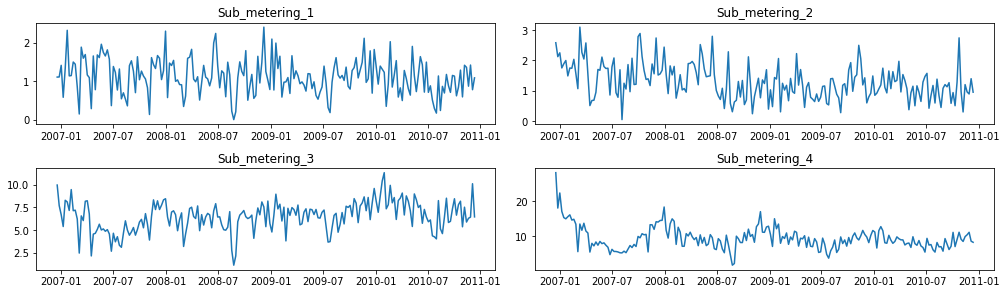

In [40]:
plot_time_values(df_weekly.loc[::,['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4']], size=(14,8))

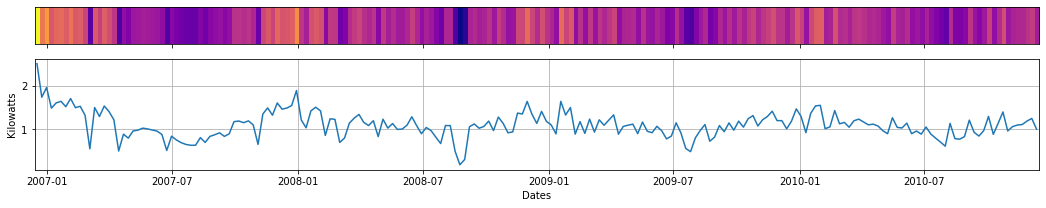

In [52]:
x = df_weekly.loc[::].index
y = df_weekly.loc[::]['Global_active_power']
plot_time_with_heatmap(x, y, 'Dates', 'Kilowatts', size=(18,3))